<a href="https://colab.research.google.com/github/akash-sureshkumar/Gold_sales_dashboard/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

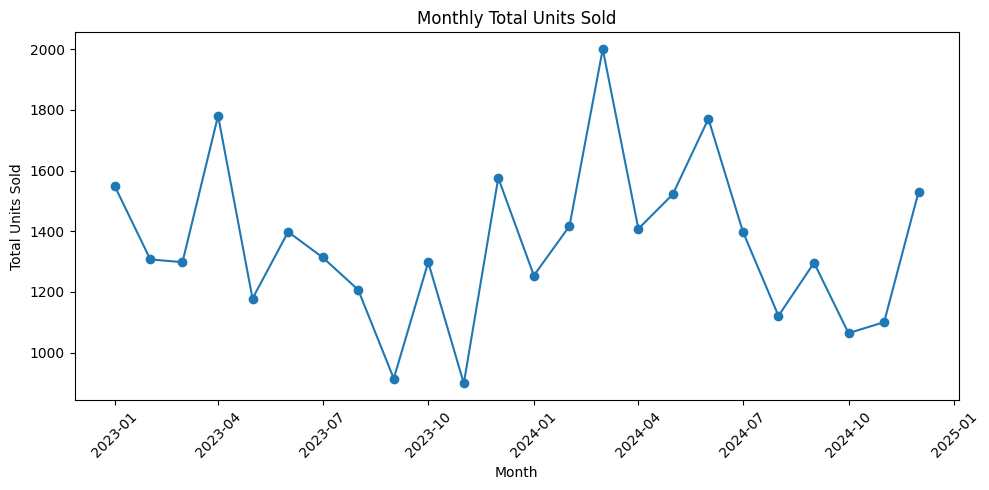

LinearRegression Mean Squared Error: 121944.53367189897
 XGB Mean Squared Error: 61336.21875
       Month  Predicted_Sales
0 2025-01-31       1399.00061
1 2025-02-28       1399.00061
2 2025-03-31       1399.00061


/tmp/ipython-input-4199467250.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start=monthly_total['Month'].max() + pd.offsets.MonthBegin(), periods=3, freq='M')


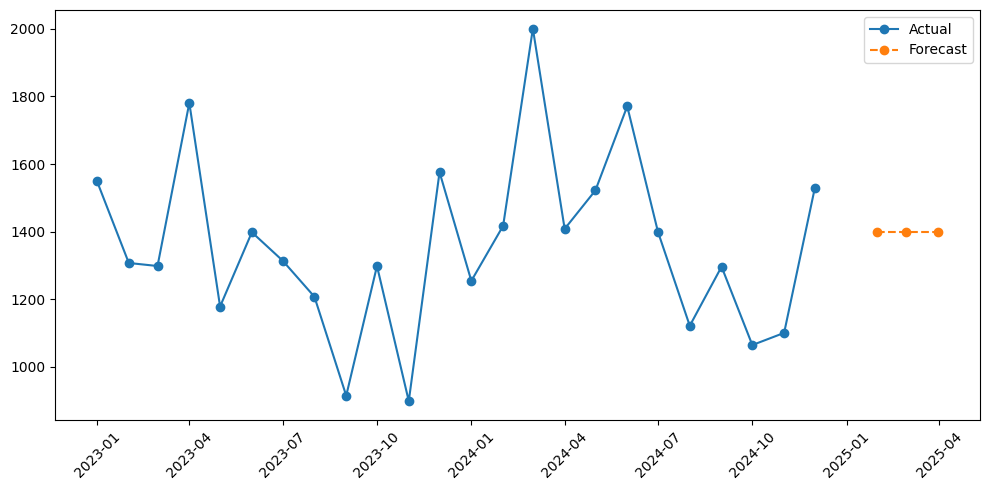

['goldsales.joblib']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost  import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
df = pd.read_csv('https://raw.githubusercontent.com/akash-sureshkumar/Gold_sales_dashboard/5174013e5d480cfbeb07a371cd073065aa2e5257/gold_sales_2023_2024.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()
monthly_total=df.groupby('Month')['Units_Sold'].sum().reset_index()
monthly_by_prod=df.groupby(['Month','Product'])['Units_Sold'].sum().unstack()
plt.figure(figsize=(10, 5))
plt.plot(monthly_total['Month'], monthly_total['Units_Sold'], marker='o',)
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.title('Monthly Total Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
monthly_total['Month_Num'] = np.arange(1, len(monthly_total) + 1)
x=monthly_total[['Month_Num']]
y=monthly_total['Units_Sold']
split=int(0.8*len(x))
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('LinearRegression Mean Squared Error:',mse)
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(' XGB Mean Squared Error:',mse)
future_nums = np.array([[len(x)+i] for i in range(1,4)])
future_preds = xgb.predict(future_nums)
future_months = pd.date_range(start=monthly_total['Month'].max() + pd.offsets.MonthBegin(), periods=3, freq='M')
df_forecast = pd.DataFrame({'Month': future_months, 'Predicted_Sales': future_preds})
print(df_forecast)
plt.figure(figsize=(10, 5))
plt.plot(monthly_total['Month'], monthly_total['Units_Sold'], marker='o', label='Actual')
plt.plot(df_forecast['Month'], df_forecast['Predicted_Sales'], label='Forecast', linestyle='--', marker='o')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
joblib.dump(xgb,'goldsales.joblib')
